In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
#df = pd.read_csv('/Users/tiggy/Documents/cli/CS 5010/Project/va_final3.csv',low_memory=False)
df = pd.read_csv('/Users/jennyjang/Desktop/CS Project/Virginia_records.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
assert len(df['id'])==590687,"Error reading in all records"

# Month-to-Month Visualization

This portion is to analyze the trend change in bike-sharing.

Define date-time aggregates in terms of start time for trip

In [4]:
df['x']=pd.to_datetime(df['started_at'])
df['month']=df['x'].dt.month
df['year']=df['x'].dt.year
df['smy'] = df['x'].dt.strftime('%Y%m')  #start month and year
df['month']=df['x'].dt.month
df['year']=df['x'].dt.year
df['day']=df['x'].dt.day
df['smyd'] = df['x'].dt.strftime('%D')  #start month, year and day
df['dow']=df['x'].dt.dayofweek  #day of week
df['hour']=df['x'].dt.hour  #hour of day
df['smydh']=df['smyd'].astype(str)+'_'+df['hour'].astype(str)  #start month, year, day, hour

Assert statements to test if date-time aggregates have correct counts

In [7]:
assert (len(pd.unique(df['day']))>=28 and len(pd.unique(df['day']))<=31),"Error in day count"
assert (len(pd.unique(df['dow']))==7),"Error in day of week count"
assert (len(pd.unique(df['hour']))==24) ,"Error in hour count"
assert (len(pd.unique(df['month']))==12),  "Error in month count"
assert (len(pd.unique(df['year']))==3),  "Error in month count"

Monthly datasets will reduce data processing and help us focus on the key months

In [20]:
dfjune=df[(df['month'] == 6)]
dffeb=df[(df['month'] == 2)]
dfmarch=df[(df['month'] == 3)]
dfmay=df[(df['month'] == 5)]
dfaug=df[(df['month'] == 8)]
dfsep=df[(df['month'] == 9)]
dfoct=df[(df['month'] == 10)]
dfdec=df[(df['month'] == 12)]

Assert statements to assure daily COVID data are mapped to month/day/year only

In [21]:
assert len(pd.unique(dfjune['Deaths']))<=31, "Error merging daily COVID death data"
assert len(pd.unique(dfaug['Hospitalizations']))<=32, "Error merging daily COVID hospitalization data"

Number of trips groupby vars

In [22]:
df['trips_y']=df.groupby('year').id.transform('count')
df['trips_my'] = df.groupby('smy').id.transform('count')
df['trips_m'] = df.groupby('month').id.transform('count')
df['trips_daily'] = df.groupby('smyd').id.transform('count')
df['trips_hourly'] = df.groupby('smydh').id.transform('count')
# citation: https://cmdlinetips.com/2019/10/how-to-add-group-level-summary-statistic-as-a-new-column-in-pandas/

Test if bar plots are plotting the correct aggregates

Text(0, 0.5, 'Trips')

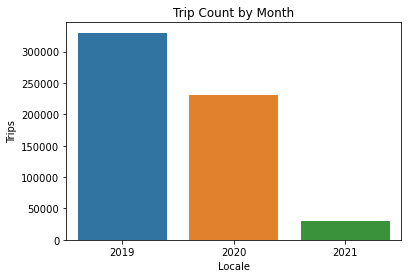

In [23]:
#validate that we are plotting the right number of observations
ax = sns.barplot(x="year", y="trips_y", data=df)
ax.set_title('Trip Count by Month')
ax.set_xlabel('Locale')
ax.set_ylabel('Trips')

In [24]:
df.year.value_counts()  #The number of trips per year match the chart!

2019    330144
2020    230536
2021     30007
Name: year, dtype: int64

Visualization: Time series of trends in COVID in VA and year to year bikesharing

Text(0.5, 1.0, 'Cum. Deaths and Hospitalizations in VA')

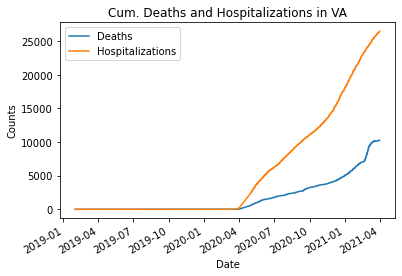

In [25]:
ts=df.set_index('x')
lines = ts['Deaths'].plot.line()
lines = ts['Hospitalizations'].plot.line()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Cum. Deaths and Hospitalizations in VA")

Text(0, 0.5, 'Trips')

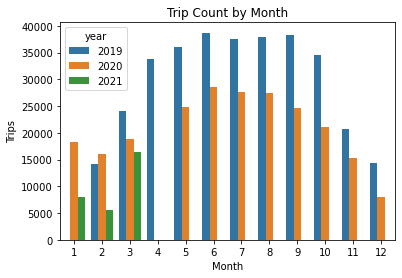

In [34]:
ax = sns.barplot(x="month", y="trips_my", hue='year',data=df)
ax.set_title('Trip Count by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Trips')

Quarterly time of day and day of week charts suggest more leisure cycling along wit reduced commuter cycling.

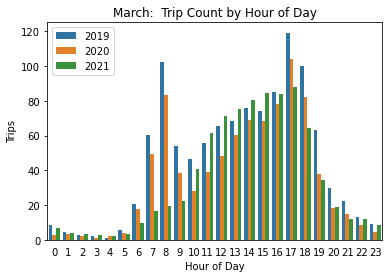

In [33]:
ax1=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfmarch, ci=None)
ax1.set_title('March:  Trip Count by Hour of Day')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Trips')
ax1.legend(loc='upper left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax1.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

Time of day analysis

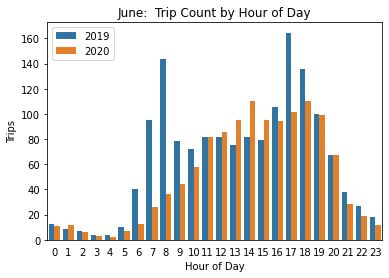

In [27]:
ax2=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfjune, ci=None)
ax2.set_title('June:  Trip Count by Hour of Day')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Trips')
ax2.legend(loc='upper left')
ax2.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

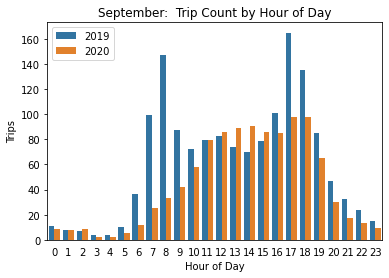

In [28]:
ax3=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfsep, ci=None)
ax3.set_title('September:  Trip Count by Hour of Day')
ax3.set_xlabel('Hour of Day')
ax3.set_ylabel('Trips')
ax3.legend(loc='upper left')
ax3.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

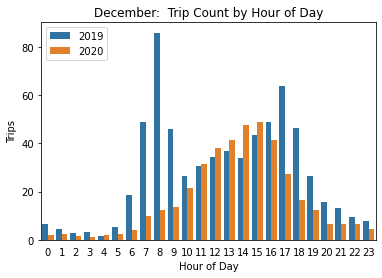

In [29]:
ax4=sns.barplot(x="hour", y="trips_hourly",hue='year',data=dfdec, ci=None)
ax4.set_title('December:  Trip Count by Hour of Day')
ax4.set_xlabel('Hour of Day')
ax4.set_ylabel('Trips')
ax4.legend(loc='upper left')
ax4.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

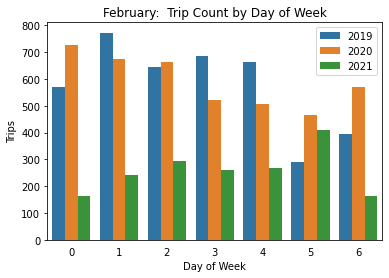

In [30]:
ax0=sns.barplot(x="dow", y="trips_daily", hue='year',data=dffeb , ci=None)
ax0.set_title('February:  Trip Count by Day of Week')
ax0.set_xlabel('Day of Week')
ax0.set_ylabel('Trips')
ax0.legend(loc='upper right')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax0.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

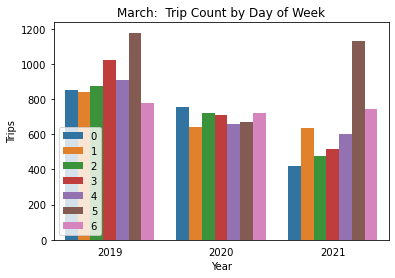

In [31]:
ax1=sns.barplot(x="year", y="trips_daily", hue='dow',data=dfmarch, ci=None)
ax1.set_title('March:  Trip Count by Day of Week')
ax1.set_xlabel('Year')
ax1.set_ylabel('Trips')
ax1.legend(loc='lower left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax1.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

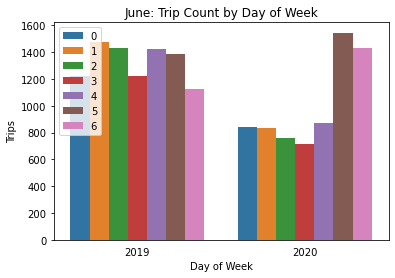

In [25]:
ax2=sns.barplot(x="year", y="trips_daily", hue='dow',data=dfjune,ci=None)
ax2.set_title('June: Trip Count by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Trips')
ax2.legend(loc='upper left')
#Adjust to include only COVID months in 2020 ; exclude Jan; redo 
ax2.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = True, bottom = False)

# Duration Change Analysis

This portion is to analyse the change in duration pre-covid vs. post-covid.

First starting with creating a new variable 'Pandemic' that splits the record to pre-covid and post-covid:

In [21]:
df["Pandemic"]= np.where(df["date"]<'2020-03-13',"Pre-COVID","Post-COVID")
df.sort_values("date")

,Unnamed: 0,Duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,member_casual,...,state,date,Report Date,Total Cases,Hospitalizations,Deaths,new_duration,new_duration(sec),new_duration(min),Pandemic
576650,5581468,584.0,2019-02-01 17:32:06,2019-02-01 17:41:51,31060.0,S Arlington Mill Dr & Campbell Ave,31056.0,S Troy St & 26th St S,W23388,member,...,Virginia,2019-02-01 00:00:00,NaN,0.0,0.0,0.0,0 days 00:09:45,585.0,9.75,Pre-COVID
576618,5581227,331.0,2019-02-01 16:43:04,2019-02-01 16:48:35,31022.0,Clarendon Metro / Wilson Blvd & N Highland St,31094.0,Lee Hwy & N Kirkwood Rd,W20634,member,...,Virginia,2019-02-01 00:00:00,NaN,0.0,0.0,0.0,0 days 00:05:31,331.0,5.52,Pre-COVID
576620,5581246,774.0,2019-02-01 16:50:40,2019-02-01 17:03:35,31023.0,Fairfax Dr & Wilson Blvd,31069.0,Pershing & N George Mason Dr,W24107,casual,...,Virginia,2019-02-01 00:00:00,NaN,0.0,0.0,0.0,0 days 00:12:55,775.0,12.92,Pre-COVID
576621,5581248,129.0,2019-02-01 16:50:47,2019-02-01 16:52:56,31003.0,Crystal Dr & 15th St S,31007.0,Crystal City Metro / 18th & Bell St,W20898,member,...,Virginia,2019-02-01 00:00:00,NaN,0.0,0.0,0.0,0 days 00:02:09,129.0,2.15,Pre-COVID
576622,5581249,919.0,2019-02-01 16:50:52,2019-02-01 17:06:12,32214.0,Reston Town Center Transit Station,32215.0,Wiehle Ave & Reston Station Blvd,W21293,member,...,Virginia,2019-02-01 00:00:00,NaN,0.0,0.0,0.0,0 days 00:15:20,920.0,15.33,Pre-COVID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514259,5024028,NaN,2021-03-31 18:37:01,2021-03-31 18:42:34,31013.0,Eads St & 22nd St S,31005.0,Pentagon City Metro / 12th St & S Hayes St,512541136C283728,member,...,Virginia,2021-03-31 00:00:00,2021-03-31 00:00:00,618976.0,26455.0,10252.0,0 days 00:05:33,333.0,5.55,Post-COVID
508523,4974058,NaN,2021-03-31 19:34:13,2021-03-31 19:53:22,31039.0,Wilson Blvd & N Quincy St,31039.0,Wilson Blvd & N Quincy St,753E80AC1156E4B1,member,...,Virginia,2021-03-31 00:00:00,2021-03-31 00:00:00,618976.0,26455.0,10252.0,0 days 00:19:09,1149.0,19.15,Post-COVID
512657,5012534,NaN,2021-03-31 13:20:49,2021-03-31 13:34:40,31014.0,Lynn St & 19th St North,31326.0,Hardy Rec Center,1251F62F7A36772F,member,...,Virginia,2021-03-31 00:00:00,2021-03-31 00:00:00,618976.0,26455.0,10252.0,0 days 00:13:51,831.0,13.85,Post-COVID
514308,5024665,NaN,2021-03-31 09:28:09,2021-03-31 09:34:50,31944.0,S Clark St & 33rd St,31011.0,Crystal Dr & 23rd St S,3C4584F59B1D768D,casual,...,Virginia,2021-03-31 00:00:00,2021-03-31 00:00:00,618976.0,26455.0,10252.0,0 days 00:06:41,401.0,6.68,Post-COVID


Checking to see what the lowest duration is:

In [22]:
df["new_duration(min)"].min()

-29032.53

From this we can see that there are negative values in our duration, probably due to some error in keeping track of records. We have decided to remove them from our analysis.


In [25]:
df["started_at"]=pd.to_datetime(df["started_at"])
df["ended_at"]=pd.to_datetime(df["ended_at"])
# only take the correct dates with no minus 
df=df[df["started_at"]<df["ended_at"]]
df["new_duration(sec)"].min()

1.0

We can see that now there is no negative values. 

We also wanted to compare day/night ride durations, so we are going to split our records to day/night as well.

In [26]:
# Create Day and Night
df["Hour"]=df["started_at"].dt.hour

#creating column "night" and "day"
df["day/night"]= np.where((df["Hour"]>19)|(df["Hour"]<5),"night","day")
df[df["day/night"]=="day"]
df.head()

,Unnamed: 0,Duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,member_casual,...,Report Date,Total Cases,Hospitalizations,Deaths,new_duration,new_duration(sec),new_duration(min),Pandemic,Hour,day/night
0,8,1904.0,2019-10-01 00:09:40,2019-10-01 00:41:25,31064.0,Gravelly Point,31612.0,D St & Maryland Ave NE,W21735,member,...,NaN,0.0,0.0,0.0,0 days 00:31:45,1905.0,31.75,Pre-COVID,0,night
1,10,777.0,2019-10-01 00:11:18,2019-10-01 00:24:15,31026.0,Washington Blvd & 10th St N,31073.0,Washington Blvd & Walter Reed Dr,W00410,member,...,NaN,0.0,0.0,0.0,0 days 00:12:57,777.0,12.95,Pre-COVID,0,night
2,36,1046.0,2019-10-01 01:07:52,2019-10-01 01:25:19,32220.0,Sunset Hills Rd & Isaac Newton Square,32216.0,Library St & Freedom Dr,W20489,casual,...,NaN,0.0,0.0,0.0,0 days 00:17:27,1047.0,17.45,Pre-COVID,1,night
3,45,1119.0,2019-10-01 01:53:24,2019-10-01 02:12:04,31014.0,Lynn St & 19th St North,31509.0,New Jersey Ave & R St NW,W22594,member,...,NaN,0.0,0.0,0.0,0 days 00:18:40,1120.0,18.67,Pre-COVID,1,night
4,47,1171.0,2019-10-01 01:56:47,2019-10-01 02:16:19,31013.0,Eads St & 22nd St S,31129.0,15th St & Pennsylvania Ave NW,W22874,member,...,NaN,0.0,0.0,0.0,0 days 00:19:32,1172.0,19.53,Pre-COVID,1,night


To make our duration analysis more intuitive, we are going to convert our duration into min.

In [27]:
df["new_duration(min)"]=df["new_duration(sec)"]/60
df["new_duration(min)"]=round(df["new_duration(min)"], 2)
df.head()

,Unnamed: 0,Duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,member_casual,...,Report Date,Total Cases,Hospitalizations,Deaths,new_duration,new_duration(sec),new_duration(min),Pandemic,Hour,day/night
0,8,1904.0,2019-10-01 00:09:40,2019-10-01 00:41:25,31064.0,Gravelly Point,31612.0,D St & Maryland Ave NE,W21735,member,...,NaN,0.0,0.0,0.0,0 days 00:31:45,1905.0,31.75,Pre-COVID,0,night
1,10,777.0,2019-10-01 00:11:18,2019-10-01 00:24:15,31026.0,Washington Blvd & 10th St N,31073.0,Washington Blvd & Walter Reed Dr,W00410,member,...,NaN,0.0,0.0,0.0,0 days 00:12:57,777.0,12.95,Pre-COVID,0,night
2,36,1046.0,2019-10-01 01:07:52,2019-10-01 01:25:19,32220.0,Sunset Hills Rd & Isaac Newton Square,32216.0,Library St & Freedom Dr,W20489,casual,...,NaN,0.0,0.0,0.0,0 days 00:17:27,1047.0,17.45,Pre-COVID,1,night
3,45,1119.0,2019-10-01 01:53:24,2019-10-01 02:12:04,31014.0,Lynn St & 19th St North,31509.0,New Jersey Ave & R St NW,W22594,member,...,NaN,0.0,0.0,0.0,0 days 00:18:40,1120.0,18.67,Pre-COVID,1,night
4,47,1171.0,2019-10-01 01:56:47,2019-10-01 02:16:19,31013.0,Eads St & 22nd St S,31129.0,15th St & Pennsylvania Ave NW,W22874,member,...,NaN,0.0,0.0,0.0,0 days 00:19:32,1172.0,19.53,Pre-COVID,1,night


<AxesSubplot:>

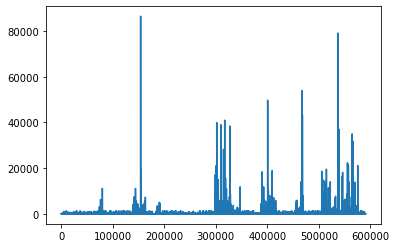

In [28]:
df["new_duration(min)"].plot()

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [30]:
df["new_duration(min)"].describe()

count    589905.000000
mean         25.547342
std         277.878735
min           0.020000
25%           6.600000
50%          13.130000
75%          24.700000
max       86434.150000
Name: new_duration(min), dtype: float64

We can see that there is a big difference in the duration even for the 75% percentil and the maximum. 

Just creating a box plot looks like this:

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


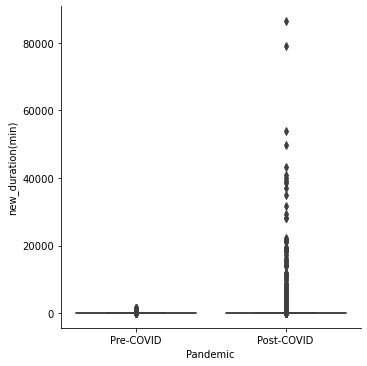

In [31]:
sns.factorplot(x='Pandemic', y='new_duration(min)', kind='box',data=df)

We can see that it doesn't really give us any information that is useful. 

Doing a little a little bit of research, most people tend to ride less than an hour, so coing to cut off our records to ~60 min and from 5 min.

In [32]:
lessthan1hr=df[df["new_duration(min)"]<=60]
lessthan1hr=lessthan1hr[lessthan1hr["new_duration(min)"]>5]
lessthan1hr

,Unnamed: 0,Duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,member_casual,...,Report Date,Total Cases,Hospitalizations,Deaths,new_duration,new_duration(sec),new_duration(min),Pandemic,Hour,day/night
0,8,1904.0,2019-10-01 00:09:40,2019-10-01 00:41:25,31064.0,Gravelly Point,31612.0,D St & Maryland Ave NE,W21735,member,...,NaN,0.0,0.0,0.0,0 days 00:31:45,1905.0,31.75,Pre-COVID,0,night
1,10,777.0,2019-10-01 00:11:18,2019-10-01 00:24:15,31026.0,Washington Blvd & 10th St N,31073.0,Washington Blvd & Walter Reed Dr,W00410,member,...,NaN,0.0,0.0,0.0,0 days 00:12:57,777.0,12.95,Pre-COVID,0,night
2,36,1046.0,2019-10-01 01:07:52,2019-10-01 01:25:19,32220.0,Sunset Hills Rd & Isaac Newton Square,32216.0,Library St & Freedom Dr,W20489,casual,...,NaN,0.0,0.0,0.0,0 days 00:17:27,1047.0,17.45,Pre-COVID,1,night
3,45,1119.0,2019-10-01 01:53:24,2019-10-01 02:12:04,31014.0,Lynn St & 19th St North,31509.0,New Jersey Ave & R St NW,W22594,member,...,NaN,0.0,0.0,0.0,0 days 00:18:40,1120.0,18.67,Pre-COVID,1,night
4,47,1171.0,2019-10-01 01:56:47,2019-10-01 02:16:19,31013.0,Eads St & 22nd St S,31129.0,15th St & Pennsylvania Ave NW,W22874,member,...,NaN,0.0,0.0,0.0,0 days 00:19:32,1172.0,19.53,Pre-COVID,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590680,5737700,823.0,2019-02-28 22:33:59,2019-02-28 22:47:42,31916.0,Potomac & Swann Ave,31098.0,King St Metro North / Cameron St,W23281,member,...,NaN,0.0,0.0,0.0,0 days 00:13:43,823.0,13.72,Pre-COVID,22,night
590681,5737704,450.0,2019-02-28 22:36:39,2019-02-28 22:44:10,31048.0,King St Metro South,31914.0,Lee Center,W22919,member,...,NaN,0.0,0.0,0.0,0 days 00:07:31,451.0,7.52,Pre-COVID,22,night
590682,5737718,883.0,2019-02-28 22:43:18,2019-02-28 22:58:01,31924.0,Wilson Blvd & N Troy St,31096.0,S Walter Reed Dr & 8th St S,W20183,member,...,NaN,0.0,0.0,0.0,0 days 00:14:43,883.0,14.72,Pre-COVID,22,night
590684,5737762,584.0,2019-02-28 23:12:00,2019-02-28 23:21:44,31037.0,Ballston Metro / N Stuart & 9th St N,31020.0,Wilson Blvd & Franklin Rd,W22650,member,...,NaN,0.0,0.0,0.0,0 days 00:09:44,584.0,9.73,Pre-COVID,23,night


We also decided to create a violin plot since it gives us more information about density as well as other basic information.

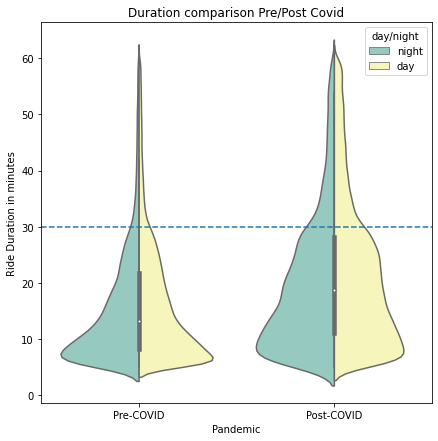

In [33]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html 
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
# ax.set(ylim=(0, 10000))
ax = sns.violinplot(x="Pandemic", y="new_duration(min)", hue="day/night",
                    data=lessthan1hr, palette="Set3", split=True)
ax.set_title('Duration comparison Pre/Post Covid')
ax.set_ylabel('Ride Duration in minutes')
ax.axhline(30,linestyle="dashed")
#ax.figure.savefig("Durationplot.png")

# Comparison on popular stations pre-covidvs. post-covid

In [35]:
# before and after COVID 19 shock 2020-03-13
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

dfc = df[(df['date'] > '2020-03-13')]
dfp = df[(df['date'] <= '2020-03-13')]

,Unnamed: 0,Duration,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,member_casual,...,Report Date,Total Cases,Hospitalizations,Deaths,new_duration,new_duration(sec),new_duration(min),Pandemic,Hour,day/night
0,8,1904.0,2019-10-01 00:09:40,2019-10-01 00:41:25,31064.0,Gravelly Point,31612.0,D St & Maryland Ave NE,W21735,member,...,NaN,0.0,0.0,0.0,0 days 00:31:45,1905.0,31.75,Pre-COVID,0,night
1,10,777.0,2019-10-01 00:11:18,2019-10-01 00:24:15,31026.0,Washington Blvd & 10th St N,31073.0,Washington Blvd & Walter Reed Dr,W00410,member,...,NaN,0.0,0.0,0.0,0 days 00:12:57,777.0,12.95,Pre-COVID,0,night
2,36,1046.0,2019-10-01 01:07:52,2019-10-01 01:25:19,32220.0,Sunset Hills Rd & Isaac Newton Square,32216.0,Library St & Freedom Dr,W20489,casual,...,NaN,0.0,0.0,0.0,0 days 00:17:27,1047.0,17.45,Pre-COVID,1,night
3,45,1119.0,2019-10-01 01:53:24,2019-10-01 02:12:04,31014.0,Lynn St & 19th St North,31509.0,New Jersey Ave & R St NW,W22594,member,...,NaN,0.0,0.0,0.0,0 days 00:18:40,1120.0,18.67,Pre-COVID,1,night
4,47,1171.0,2019-10-01 01:56:47,2019-10-01 02:16:19,31013.0,Eads St & 22nd St S,31129.0,15th St & Pennsylvania Ave NW,W22874,member,...,NaN,0.0,0.0,0.0,0 days 00:19:32,1172.0,19.53,Pre-COVID,1,night


<AxesSubplot:>

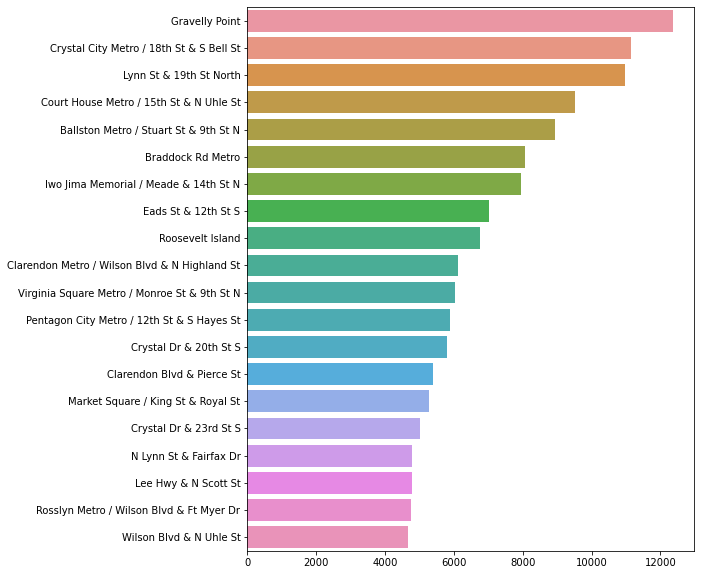

In [36]:
# Before Covid
startstation = dfp['start_station_name'].value_counts()[:20]
plt.figure(figsize=(8,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  )

<AxesSubplot:>

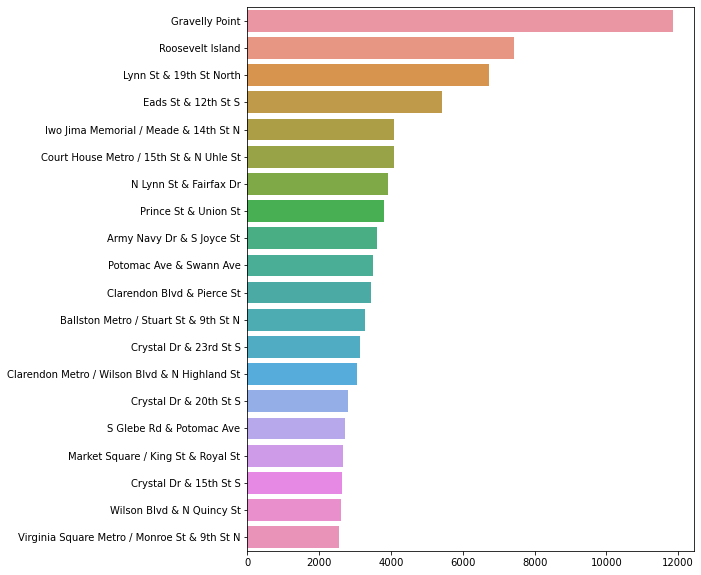

In [37]:
# After covid
startstation = dfc['start_station_name'].value_counts()[:20]
plt.figure(figsize=(8,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  )